In [1]:
pacotes <- c("dplyr","tidyr","ggplot2","rbcb","forecast","ggthemes")
for(i in pacotes){
    suppressPackageStartupMessages(library(i, character.only = T))
}

In [4]:
#Série temporal do BCB do IPCA
inicio <- as.Date("1996-01-01")
inf <- get_series(c(IPCA = 433), as = "ts", start_date = inicio)
year <- lubridate::year(inicio)
month <- lubridate::month(inicio)
#Monta as matrizes para colocar os dados das previsões
fore <- matrix(0, nrow = length(inf)-25)
fore_s <- matrix(0, nrow = length(inf)-25)
fore_i <- matrix(0, nrow = length(inf)-25)

In [22]:
#Loop gerador das previsões de 1 período
for(i in 25:length(inf)){
  inf_ar <- Arima(ts(inf[1:i], start = c(year,month), frequency = 12),
                  seasonal = c(1,0,0), order = c(1,0,0))
  forec <- forecast(inf_ar, h = 1)
  fore[i-24] <- forec$mean
  fore_s[i-24] <- forec$upper[,2]
  fore_i[i-24] <- forec$lower[,2]
}

In [23]:
#Armazena os dados das previsões
data <- data.frame(Data = seq(as.Date("1998-01-01"), as.Date("2020-07-01"),"1 month"),
                   Mean = fore,
                   Upper = fore_s,
                   Lower = fore_i,
                   Real = inf[25:length(inf)])

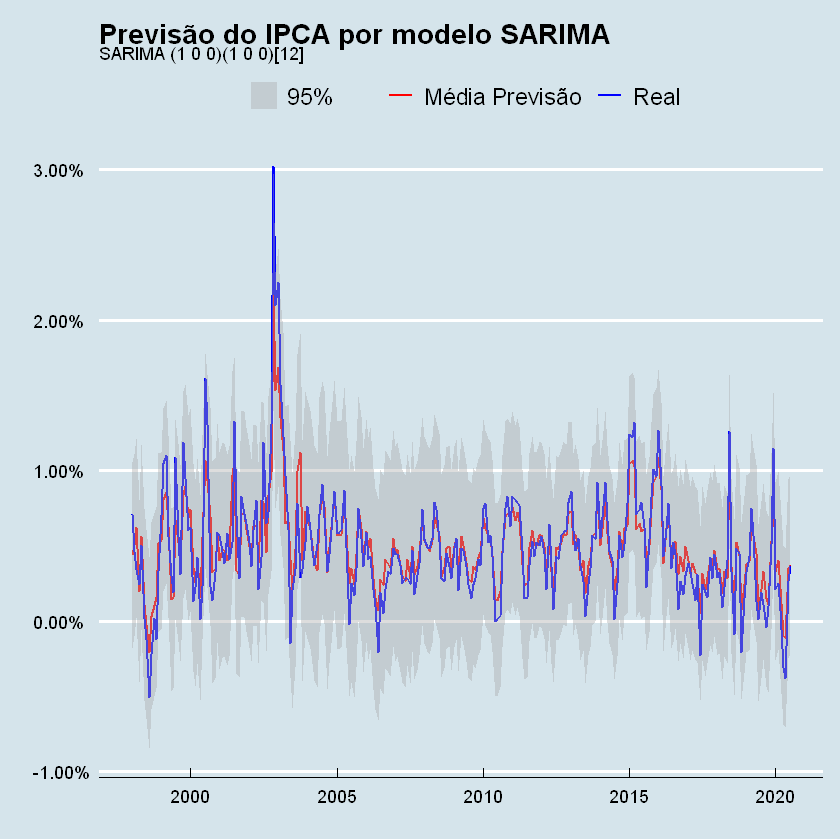

In [24]:
#Plota o gráfico
data %>%
  ggplot(aes(x = Data))+
  geom_line(aes(y = Mean/100, col = "Média Previsão"), size = 0.7)+
  geom_line(aes(y = Real/100, col = "Real"), size = 0.7)+
  geom_ribbon(aes(ymin = Lower/100, ymax = Upper/100, fill = "95%"), alpha = 0.4)+
  scale_colour_manual("", values = c("red","blue"))+
  theme_economist()+
  scale_y_continuous(labels = scales::percent)+
  labs(x = "", y = "", title = "Previsão do IPCA por modelo SARIMA",
       subtitle = "SARIMA (1 0 0)(1 0 0)[12]")+
  scale_fill_manual("",values = "darkgrey")